In [125]:
# importing required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [126]:
def heading(info):
    print("\n\n##### {} #####".format(info))

In [127]:
# read the dataset
dataSet = pd.read_csv('dataset/transformed_train_df.csv', encoding = 'unicode_escape')
dataSet = dataSet.iloc[:, 1:]
dataSet.head()

,FAMD_Component_2,FAMD_Component_3,FAMD_Component_4,FAMD_Component_5,FAMD_Component_6,FAMD_Component_7,FAMD_Component_8,FAMD_Component_9,FAMD_Component_10,FAMD_Component_11,FAMD_Component_12,FAMD_Component_13,FAMD_Component_14,FAMD_Component_15,FAMD_Component_16,FAMD_Component_17,FAMD_Component_18,FAMD_Component_19,FAMD_Component_20,Label
0,-1.137678,4.466658,1.470095,-0.084904,2.158798,-2.801462,0.754955,-0.664978,-0.576842,0.671979,0.078739,0.060634,0.068731,0.664680,-0.113278,-0.066584,0.333080,0.174933,0.159136,Benign
1,-1.188577,-7.934534,8.735732,3.640803,-1.384045,-2.374773,-0.234244,0.346913,0.314857,-0.499535,-0.101929,0.048902,0.492341,0.562892,1.643216,-1.250156,-0.040728,-0.081074,-0.201267,Benign
2,-1.192777,-7.940798,8.719191,3.761521,-1.074641,-2.232508,-0.189872,0.085965,0.068831,-0.659088,-0.293655,-0.005538,0.485875,0.672605,1.718518,-0.976387,-0.456943,-0.341419,-0.139144,Benign
3,-1.082249,2.674097,0.316319,0.198176,0.508622,-2.134621,0.446632,0.394315,0.390091,0.420473,0.792046,-0.682007,-0.079451,0.126557,0.726853,1.115189,-1.294194,0.699751,-0.055606,Benign
4,-1.187186,-7.949306,8.745446,3.647240,-1.378491,-2.381798,-0.228476,0.363864,0.330884,-0.490771,-0.110627,0.047440,0.455616,0.535578,1.525171,-1.194465,-0.022583,-0.068391,-0.202523,Benign




##### Target variable "Ransomware " distribution #####


<Axes: xlabel='Label', ylabel='Count'>

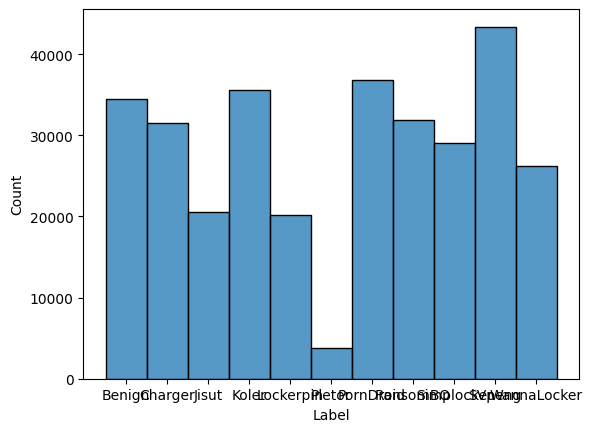

In [128]:
# Data distribution 
heading("Target variable \"Ransomware \" distribution")
sns.histplot(data = dataSet, x = "Label")

In [129]:
def convert_categorical_to_numeric(dataframe, categorical_cols):
    
    for col in categorical_cols:
        if col in dataframe.columns:
            # create a mapping for the unique values in the column
            unique_values = dataframe[col].unique()
            value_mapping = {label: idx for idx, label in enumerate(unique_values)}
            
            # apply the mapping to convert to numeric
            dataframe[col] = [value_mapping[val] for val in dataframe[col]]
    
    return dataframe

In [130]:
import pandas as pd
import random

def modify_and_balance_labels(df):
    """
    Modifies labels in a DataFrame and balances the dataset.

    Args:
        df: The input DataFrame.

    Returns:
        The modified DataFrame with balanced labels.
    """

    # Modify labels: 0 for 'Benign', 1 otherwise
    df['Label'] = df['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

    # Count the number of rows with Label 1
    num_label_1 = df[df['Label'] == 1].shape[0]
    num_label_0 = df[df['Label'] == 0].shape[0]

    # If there are more rows with Label 1, randomly remove excess rows
    if num_label_1 > num_label_0:
        indices_to_remove = random.sample(df[df['Label'] == 1].index.tolist(), num_label_1 - num_label_0)
        df = df.drop(indices_to_remove)

    return df

In [131]:
originalDataset = dataSet.copy()

# select the relevant columns and convert them
columnsToConvert = ["Label"]
dataSet = modify_and_balance_labels(dataSet)

dataSet.to_csv('binary_ransomware.csv')

heading("After conversion to binary")
print(dataSet[columnsToConvert].head(5))



##### After conversion to binary #####
   Label
0      0
1      0
2      0
3      0
4      0


In [132]:
# seperate the input and target columns into numpy arrays
Y = dataSet['Label'].values

# Extract all other columns as features (X)
X = dataSet.drop('Label', axis=1).values

print(X.shape)  # Print the shape of X
print(Y.shape)  # Print the shape of Y

# adding extra column for intercepts
X = np.hstack((np.ones((X.shape[0], 1)), X))
heading("Printing X and Y variables for the model")
print(X[:5])
print(Y[:5])

(69008, 19)
(69008,)


##### Printing X and Y variables for the model #####
[[ 1.00000000e+00 -1.13767799e+00  4.46665781e+00  1.47009478e+00
  -8.49041825e-02  2.15879784e+00 -2.80146234e+00  7.54955196e-01
  -6.64977954e-01 -5.76842029e-01  6.71978783e-01  7.87389225e-02
   6.06338126e-02  6.87309743e-02  6.64679687e-01 -1.13277951e-01
  -6.65838203e-02  3.33079844e-01  1.74933011e-01  1.59136086e-01]
 [ 1.00000000e+00 -1.18857705e+00 -7.93453410e+00  8.73573213e+00
   3.64080327e+00 -1.38404509e+00 -2.37477305e+00 -2.34244376e-01
   3.46913418e-01  3.14856968e-01 -4.99535481e-01 -1.01928863e-01
   4.89016671e-02  4.92340612e-01  5.62891710e-01  1.64321628e+00
  -1.25015618e+00 -4.07275318e-02 -8.10737750e-02 -2.01267283e-01]
 [ 1.00000000e+00 -1.19277678e+00 -7.94079765e+00  8.71919079e+00
   3.76152134e+00 -1.07464098e+00 -2.23250848e+00 -1.89871821e-01
   8.59654471e-02  6.88314305e-02 -6.59088394e-01 -2.93655110e-01
  -5.53786368e-03  4.85875285e-01  6.72604727e-01  1.71851800e+0

In [133]:
import pandas as pd
import random

def modify_and_balance_labels(df):
    """
    Modifies labels in a DataFrame and balances the dataset.

    Args:
        df: The input DataFrame.

    Returns:
        The modified DataFrame with balanced labels.
    """

    # Modify labels: 0 for 'Benign', 1 otherwise
    df['Label'] = df['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

    # Count the number of rows with Label 1
    num_label_1 = df[df['Label'] == 1].shape[0]
    num_label_0 = df[df['Label'] == 0].shape[0]

    # If there are more rows with Label 1, randomly remove excess rows
    if num_label_1 > num_label_0:
        indices_to_remove = random.sample(df[df['Label'] == 1].index.tolist(), num_label_1 - num_label_0)
        df = df.drop(indices_to_remove)

    return df

In [134]:
# shuffle the datasets
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
# 
X_shuffled = X[indices]
Y_shuffled = Y[indices]

# split the dataset into 80:20
split_ratio = 0.8
split_index = int(len(X_shuffled) * split_ratio)

X_train = X_shuffled[:split_index]
Y_train = Y_shuffled[:split_index]

X_test = X_shuffled[split_index:]
Y_test = Y_shuffled[split_index:]

print("Training set samples: ", X_train.shape[0])
print("Testing set samples: ", X_test.shape[0])

Training set samples:  55206
Testing set samples:  13802


In [135]:
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y, y_hat):
    n = len(y)
    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss


In [136]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=100000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            # Linear model: X @ w + b
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid to get predictions
            y_hat = sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_hat - y))
            db = (1 / n_samples) * np.sum(y_hat - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        y_hat = self.predict_proba(X)
        return np.where(y_hat >= 0.5, 1, 0)


In [137]:
class Norm:
    def normalise(self,X):
        # Remove nan columns
        X = X[:, ~np.isnan(X).any(axis=0)]

        self.mean = np.mean(X)
        self.std_dev = np.std(X)
        return (X - self.mean) / (self.std_dev + 1e-8) # Avoid division by 0
    
    def denormalize(self, X):
        return X*self.std_dev+ self.mean

In [138]:
model = LogisticRegression(learning_rate=0.1, n_iters=1000)

Xnorm = Norm()
Ynorm = Norm()

#Normalizing data
X = Xnorm.normalise(X_train)

model.fit(X,Y_train)

In [ ]:
X_nt = Xnorm.normalise(X_test)
Y_proba = model.predict_proba(X_test)

Y_pred = np.round(Y_proba)
print("Predictions:", Y_pred)

#Error in terms of probabilities
MAPE = np.mean(Y_test == Y_pred)*100
RMSE = np.sqrt(np.mean(np.square(Y_test - Y_pred)))

heading("Printing the MAPE and first 10 predictions with actual values")
print("Classification: {} %".format(MAPE))
print("RMSE: {}".format(RMSE))

for i in range(10):
    print("\nPredicted value: {0} \t Actual value: {1}".format(Y_pred[i], Y_test[i]))

Predictions: [0. 1. 1. ... 1. 0. 1.]


##### Printing the MAPE and first 10 predictions with actual values #####
Classification: 0.5409360962179395 %
RMSE: 0.6775425475806376

Predicted value: 0.0 	 Actual value: 1

Predicted value: 1.0 	 Actual value: 1

Predicted value: 1.0 	 Actual value: 1

Predicted value: 0.0 	 Actual value: 0

Predicted value: 0.0 	 Actual value: 0

Predicted value: 0.0 	 Actual value: 0

Predicted value: 1.0 	 Actual value: 1

Predicted value: 0.0 	 Actual value: 0

Predicted value: 1.0 	 Actual value: 1

Predicted value: 1.0 	 Actual value: 1
